## Analysis
* Out of 618 cities sampled, 551 were found in the weather API.
* Plotting Latitude vs Longitude shows that the sample of cities is spread over the globe (where there is land, see the world map shape of the scatter plot), which indicates we are covering all regions and the analysis is valid.
* Given the analysis was performed during summer in north hemisphere, we can see higher temperature concentration between latitudes 0 and 40. If analysis was performed during winter, we would expect highest temperatures for negative latitudes.
* Latitudes close to zero seems to have the highest humidity levels and the range increases as we move to higher latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from matplotlib import style
style.use('ggplot')

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
unit = "imperial"

# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units={unit}&appid={api_key}&q="

# Create empty lists to collect weather information
cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
counter = 0

print("----------------------------")
print("Beginning Data Retrieval")
print("----------------------------")

# Loop through each city
for city in cities:
    
    # Add to the counter and print the city number and name
    counter += 1
    print("Processing city " + str(counter) + ": " + city)
    
    # API call to get information for curret city in the loop
    response = requests.get(url + city).json()
    
    # Check if information was found in the API call
    try:
        # If yes, then append information to each list created above and print the URL
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_found.append(city)
        print(url + city)
    except KeyError:
        # If not, then print that city was not found and the process is skipping it
        print("City " + city + " not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Completed")
print("----------------------------")

----------------------------
Beginning Data Retrieval
----------------------------
Processing city 1: salalah
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=salalah
Processing city 2: norman wells
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=norman wells
Processing city 3: new norfolk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=new norfolk
Processing city 4: victoria
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=victoria
Processing city 5: maldonado
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=maldonado
Processing city 6: hobart
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=hobart
Processing city 7: rikitea
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=alofi
Processing city 62: novoagansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=novoagansk
Processing city 63: zabol
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=zabol
Processing city 64: skibbereen
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=skibbereen
Processing city 65: guapi
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=guapi
Processing city 66: mataura
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=mataura
Processing city 67: goroka
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=goroka
Processing city 68: cheney
http://api.openweathermap.or

City amderma not found. Skipping...
Processing city 127: vetluzhskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=vetluzhskiy
Processing city 128: kisangani
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=kisangani
Processing city 129: jamestown
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=jamestown
Processing city 130: saint george
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=saint george
Processing city 131: bonavista
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=bonavista
Processing city 132: margate
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=margate
Processing city 133: rubidoux
http://api.openweathermap.org/data/2.5/weather?units=imperial&ap

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=mabaruma
Processing city 189: hamilton
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=hamilton
Processing city 190: kalabo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=kalabo
Processing city 191: paragominas
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=paragominas
Processing city 192: horni plana
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=horni plana
Processing city 193: kuytun
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=kuytun
Processing city 194: weiden
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=weiden
Processing city 195: olean
http://ap

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=namibe
Processing city 250: karaul
City karaul not found. Skipping...
Processing city 251: fortuna
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=fortuna
Processing city 252: waipawa
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=waipawa
Processing city 253: cayenne
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=cayenne
Processing city 254: bac lieu
City bac lieu not found. Skipping...
Processing city 255: olafsvik
City olafsvik not found. Skipping...
Processing city 256: bengkulu
City bengkulu not found. Skipping...
Processing city 257: oranjemund
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=oranjemund
Processing city 258: high level
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=sorland
Processing city 312: bethel
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=bethel
Processing city 313: macamic
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=macamic
Processing city 314: saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=saint-pierre
Processing city 315: zhaotong
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=zhaotong
Processing city 316: moose factory
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=moose factory
Processing city 317: montrose
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=montrose
Processing city 318: bath

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=pontianak
Processing city 372: marshall
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=marshall
Processing city 373: altamont
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=altamont
Processing city 374: ambilobe
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=ambilobe
Processing city 375: taoudenni
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=taoudenni
Processing city 376: port lincoln
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=port lincoln
Processing city 377: ketchikan
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=ketchikan
Processing city 378: hi

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=tongchuan
Processing city 435: tsihombe
City tsihombe not found. Skipping...
Processing city 436: mirabad
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=mirabad
Processing city 437: tumaco
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=tumaco
Processing city 438: amuntai
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=amuntai
Processing city 439: hofn
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=hofn
Processing city 440: kalmunai
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=kalmunai
Processing city 441: houston
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=parabel
Processing city 498: fairhope
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=fairhope
Processing city 499: abu samrah
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=abu samrah
Processing city 500: itacare
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=itacare
Processing city 501: niceville
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=niceville
Processing city 502: namatanai
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=namatanai
Processing city 503: bridgetown
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=bridgetown
Processing city 504: butter

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=borkenes
Processing city 560: hazorasp
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=hazorasp
Processing city 561: panlaitan
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=panlaitan
Processing city 562: hualmay
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=hualmay
Processing city 563: traralgon
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=traralgon
Processing city 564: tukrah
City tukrah not found. Skipping...
Processing city 565: rawson
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=rawson
Processing city 566: grindavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee

In [4]:
# Create Data Frame with the lists created in previous step
weather_df = pd.DataFrame({
    "City": cities_found,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Check number of rows for each information collected in previous step, for cities that were found
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [5]:
# Export file as a CSV, without the Pandas index and but with the header
weather_df.to_csv(output_data_file, index=False, header=True)

In [6]:
# Display first 5 rows of the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,salalah,90,OM,1535205000,100,17.01,54.10,73.4,2.24
1,norman wells,75,CA,1535209500,93,65.28,-126.83,48.2,2.24
2,new norfolk,0,AU,1535209200,70,-42.78,147.06,48.2,8.05
3,victoria,75,BN,1535209200,83,5.28,115.24,82.4,1.12
4,maldonado,75,UY,1535205600,57,-34.91,-54.96,51.8,25.28


## Latitude vs Longitude

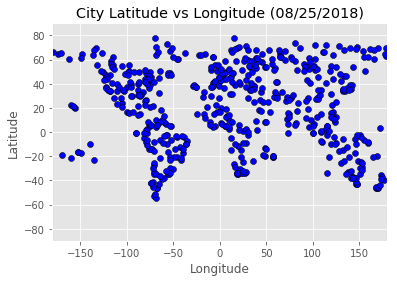

In [7]:
# Get the date stamp
today = datetime.now()
today = today.strftime("%m/%d/%Y")

# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lng"],weather_df["Lat"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Longitude ({today})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-180,180)
plt.ylim(-90,90)

# Save scatter plot to a png image and show
plt.savefig("Output/longitude_latitude.png")
plt.show()

## Latitude vs Temperature Plot

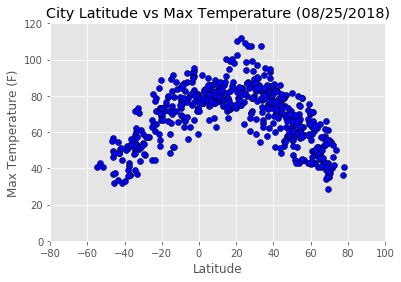

In [8]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.ylim(0,120)

# Save scatter plot to a png image and show
plt.savefig("Output/temperature_latitude.png")
plt.show()

## Latitude vs Humidity Plot

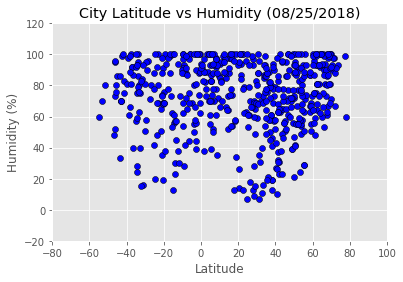

In [9]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Humidity"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)

# Save scatter plot to a png image and show
plt.savefig("Output/humidity_latitude.png")
plt.show()

## Latitude vs Cloudiness Plot

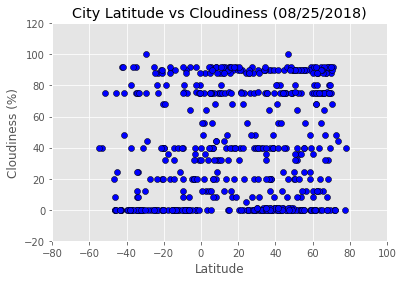

In [10]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)

# Save scatter plot to a png image and show
plt.savefig("Output/cloudiness_latitude.png")
plt.show()

## Latitude vs Wind Speed Plot

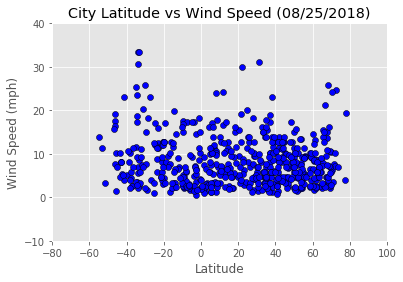

In [11]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.ylim(-10,40)

# Save scatter plot to a png image and show
plt.savefig("Output/wind_latitude.png")
plt.show()